## **1. Business Understanding**: 
Predicting Customer Churn for SyriaTel

### Stakeholders:
The primary stakeholder for this project is **SyriaTel**, a leading telecommunications company.  
Secondary stakeholders include:
- **Customer Retention Team**: Responsible for identifying and implementing strategies to reduce churn.
- **Marketing Department**: Uses churn insights to create targeted campaigns and promotions.
- **Business Analysts & Data Scientists**: Leverage machine learning models to understand customer behavior and inform strategy.
- **Customer Service Representatives**: Can proactively engage with at-risk customers to address issues and improve satisfaction.

### Business Problem:
Customer churn is a critical issue in the telecom industry. It can result in revenue loss, increased customer acquisition costs, and reduced brand loyalty.  
In a highly competitive market, SyriaTel must proactively identify and respond to customer dissatisfaction before they switch to competitors.

### **Objectives**:
- Identifying customers most likely to churn before they leave.
- Understanding the drivers of churn, such as service quality, pricing, or competitor offers.
- Implementing personalized strategies to retain high-risk customers.
- Reducing acquisition costs by improving retention.

### Business Impact:
- **Reduce churn rates**: Accurate churn prediction allows proactive retention efforts.
- **Optimize marketing strategies**: Target promotions to at-risk customers based on usage and behavior.
- **Enhance customer satisfaction**: Identify pain points and improve service quality.
- **Increase revenue**: Lower churn means higher customer lifetime value and reduced acquisition costs.

### Dataset Selection:
The **SyriaTel Customer Churn** dataset was chosen for this project. It provides a 9-month record of customer behavior, including call activity, service usage, and social network analysis (SNA) features. These rich variables support high-accuracy churn prediction and enable data-driven decision-making.


## **2.Data Understanding**:
 Exploring the SyriaTel Customer Churn Dataset


###  Overview of the data set
1. Loading the dataset
2. View statistical summary of the dataset
3. Feature selection: choose the relevant columns only.
4. Checking class balance to ensure fair predictions.
5. Exploring correlations to understand feature relationships.

### 1. Data Loading

In [237]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [238]:
#loading the dataset
telecom_data = pd.read_csv('SyriaTel_customer_churn.csv.csv')
# Display the first few rows of the dataset
telecom_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [239]:
#print out area code
print(telecom_data['area code'].unique())

[415 408 510]


In [240]:
#check the dataset information
telecom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### **SyriaTel Customer Churn Dataset Overview**

#### **Dataset Summary**
The dataset consists of **3333 entries** and **21 columns**, containing information about customer interactions, call usage, service plans, and churn status.

#### **Data Types**
- **Categorical Features (Object)**
  - `state`: The customer’s state of residence.
  - `phone number`: Unique identifier for customers.
  - `international plan`: Indicates if the customer has an international calling plan (`yes`/`no`).
  - `voice mail plan`: Indicates if the customer has a voicemail service (`yes`/`no`).

- **Numerical Features (Int64 & Float64)**
  - `account length`: The duration of the customer’s account in days.
  - `area code`: The customer’s area code.
  - `number vmail messages`: Number of voicemail messages recorded.
  - `total day minutes`, `total eve minutes`, `total night minutes`: Total minutes spent on calls during different times of the day.
  - `total day calls`, `total eve calls`, `total night calls`: Number of calls made during different times of the day.
  - `total day charge`, `total eve charge`, `total night charge`: Corresponding charges based on call durations.
  - `total intl minutes`: Total minutes spent on international calls.
  - `total intl calls`: Number of international calls made.
  - `total intl charge`: Total cost of international calls.
  - `customer service calls`: Number of calls made to customer service.

- **Boolean Feature**
  - `churn`: A binary label indicating whether the customer has left the service (`True` for churned customers and `False` for retained customers). 

### 2. Statistical Summary of the dataset

In [241]:
#view statistics of the dataset
telecom_data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Overview of Data Distribution**
- The dataset contains 3333 customer records, meaning every column has 3333 values, indicating there are no missing values in these numerical features.
- The statistics help identify trends, variations, and potential outliers across different attributes related to customer activity.

#### **Key Features**
**Account Length** (Duration of customer subscription)

- Mean: 101.06 days, indicating that most customers stay slightly over three months before possible churn.
- Min: 1 day, suggesting some customers left almost immediately.
- Max: 243 days, meaning the longest subscription duration in the dataset.

**Area Code** (Geographical identifier)
- Mean: 437, showing the common area codes assigned to customers.
- Min: 408, Max: 510, showing that customers belong to three different area codes.

**Number of Voicemail Messages**
- Mean: 8.10 messages, but notice that 50% of customers (median) have 0 voicemail messages, meaning voicemail usage is limited.
- Some customers have up to 51 messages, suggesting they actively use voicemail.

**Call Durations** (Day, Evening, Night, International)
- Day Calls: Mean of 100.43 calls, showing normal calling activity.
- Evening Calls: Slightly similar with a mean of 100.11 calls.
- Night Calls: Mean 100.10 calls, maintaining consistency.
- International Calls: Mean 4.48 calls, showing international calling is significantly lower.
- Call Duration Trends:
- Customers spend around 179.77 minutes per day, 200.98 minutes in the evening, and 200.87 minutes at night.
- The highest recorded day call duration is 350.8 minutes, meaning some customers have an extremely high calling activity.

**Billing Charges** (Day, Evening, Night, International)
- Day charge: Mean $30.56, ranging from $0.00 to $59.64.
- Evening charge: Mean $17.08, similar to day usage.
- Night charge: Mean $9.03, with lower costs.
- International charge: Mean $2.76, as expected with fewer international calls.

#### **Customer Service Calls**
- Mean: 1.56 calls, meaning most customers rarely contact customer support.
- Max: 9 calls – These customers likely had significant issues and might be more prone to churn.

#### **Outliers & Insights**
- Voicemail messages have a high range (0 to 51), showing a mix of users who ignore voicemail entirely and those who rely on it heavily.
- Call durations & charges have some extreme values, indicating customers with high engagement versus those who rarely use services.
- Customer service calls show that those with frequent support interactions may have complaints and are likely to churn.

### **Implications**
- Customers who make fewer calls or contact support more often might be at a higher churn risk.
- The dataset reveals patterns in telecom usage, allowing SyriaTel to create personalized retention strategies.
- Recognizing customers with unusual billing or calling behavior can help predict high-value users vs. potential churners.


## **3.Data Preparation**


### Data Cleaning

Data cleaning is a process that ensures that the dataset is free of inconsistencies, errors, and irrelevant information. A well-cleaned dataset improves the performance and reliability of predictive models.

**Steps in Data Cleaning**

**a) Removing Irrelevant Columns**
Some columns in the dataset do not contribute to churn prediction hence we drop the following columns:
- `phone number`: A unique identifier, not useful for prediction.

**b) **Converting Boolean Target Variable to Integer**
Machine learning models require numerical input, so the `churn` column should be converted from `True`/`False` to `1`/`0`.

**c) Checking for duplicate entries**
-Duplicate records can distort model training and lead to misleading insights.

**d) handling outliers**
-Outliers can significantly impact model accuracy, so detecting and managing them is important. Use the Interquartile Range (IQR) method.

**e) Scaling and normalization**
- Certain machine learning models perform better when numerical features are standardized. we use StandardScaler to scale in this case.


**f) Standardizing Column Names in the DataFrame**

To ensure consistency in column naming, we replace spaces with underscores and capitalize the first letter of each word. This improves readability and uniformity across the dataset.




In [242]:
#**dropping unnecessary columns **
telecom_data.drop(['phone number'], axis=1)

#**correcting data types**
telecom_data['churn'] = telecom_data['churn'].astype(int)

#**checking for missing values**
missing_values = telecom_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

#** checking for duplicates**
duplicates = telecom_data.duplicated().sum()

#**removing outliers using IQR method**
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

Syria_df = remove_outliers_iqr(telecom_data, 'total day minutes')

# Standardizing column names and capitalize every first letter in the dataframe
Syria_df.columns = [col.lower().replace(' ', '_') for col in Syria_df.columns]


print("Data types after conversion:\n", Syria_df.dtypes)
print("Number of rows after outlier removal:", Syria_df.shape[0])


Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
Data types after conversion:
 state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float

In [243]:
Syria_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [244]:
#converting 'area code' to object type
telecom_data['area code'] = telecom_data['area code'].astype(object)

In [245]:
# check the shape of the dataset
print(f"Number of rows: {Syria_df.shape[0]}")
print(f"Numbber of columns: {Syria_df.shape[1]}\n")
# display the numerical and categorical columns
print(f"Numerical columns: {Syria_df.select_dtypes(include='number').columns}\n")
print(f"Categorical columns: {Syria_df.select_dtypes(include='object').columns}\n")

Number of rows: 3308
Numbber of columns: 21

Numerical columns: Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Categorical columns: Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')



## ***4. Exploratory Data Analysis***

**Exploratory Data Analysis** (EDA) is the process of examining, summarizing, and visualizing a dataset to uncover patterns, trends, and relationships before building predictive models. It is an essential step in any data science project because it helps identify potential issues, key insights, and the most relevant features for machine learning.

EDA allows us to:
- Understand Data Distributions – Analyze how features are spread using histograms and density plots.
- Detect Data Quality Issues – Identify missing values, duplicates, and inconsistencies.
- Discover Relationships Between Variables – Use correlation heatmaps to see how features interact.
- Compare Groups – Analyze differences between churned vs. retained customers.
- Assess Feature Importance – Find key predictors that contribute most to churn.

What We Will Be Doing in EDA
1. ***Visualizing Feature Distributions*** – Using histograms and box plots to examine data spread.
2. ***Performing Correlation Analysis*** – Identifying relationships between numerical variables.
3. ***Multicollinearlity Check*** 
4. ***Checking for Data Imbalances & Patterns*** – Ensuring fair representation in the dataset.


### **1. Visualizing feauture Distributions.**


In this section, we explore individual features to understand their distribution, central tendency, spread, and any anomalies.

- **Numerical features**
We use histograms-to help visualize the spread and frequency of numerical values and boxplots-to help compare churn vs. non-churn customers for numerical features.
 observe their shape and detect outliers.

- **Categorical features** 
We use countplots to visualize the distribution of categorical variables. This helps us understand the composition of the customer base:

    - **International Plan**: Whether the customer is subscribed to an international calling plan.
    - **Voice Mail Plan**: Whether the customer has a voicemail service.
    - **State** : Customer location. Due to the high number of unique states, we visualize only the top 10 by customer count.



In [246]:
categorical_cols = Syria_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:")
for col in categorical_cols:
    print(f"- {col}")

Categorical columns:
- state
- phone_number
- international_plan
- voice_mail_plan


#### *Numerical Features*
*a) The spread and frequency distribution*

Numerical columns:
- account_length
- area_code
- number_vmail_messages
- total_day_minutes
- total_day_calls
- total_day_charge
- total_eve_minutes
- total_eve_calls
- total_eve_charge
- total_night_minutes
- total_night_calls
- total_night_charge
- total_intl_minutes
- total_intl_calls
- total_intl_charge
- customer_service_calls
- churn


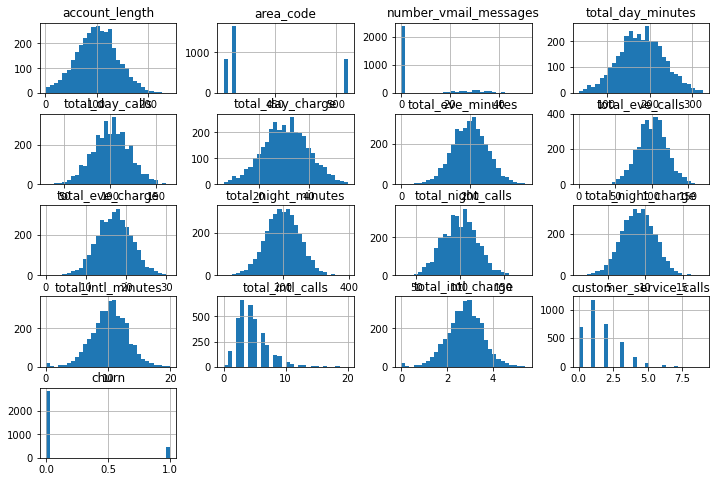

<Figure size 864x576 with 0 Axes>

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical features
numerical_cols = Syria_df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:")
for col in numerical_cols:
    print(f"- {col}")

# Plot histograms for numerical features
Syria_df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.figure(figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()


 Each histogram above provides insights into how values are spread across different ranges.

**Key Observations**
1. **Numerical Feature Distributions**
   - Features like `Total_Day_Minutes`, `Total_Eve_Minutes`, and `Total_Night_Minutes` appear to follow a **right-skewed distribution**, indicating that most customers have lower usage while a few have high usage.
   - `Total_Intl_Calls` and `Customer_Service_Calls` may have discrete values with peaks, suggesting **common usage patterns** among customers.

2. **Churn Distribution**
   - The histogram for `Churn` is **binary**, showing the count of churned (1) vs. retained (0) customers.
   - This gives an initial view of **class imbalance**, which may require handling in modeling.

3. **Potential Insights**
   - Some features exhibit **normal distributions**, while others show **skewness**, which may impact model accuracy.
   - Outlier detection can be confirmed for variables like `Total_Day_Charge` and `Total_Intl_Minutes`.


*b)Churn Distribution*

0    2837
1     471
Name: churn, dtype: int64


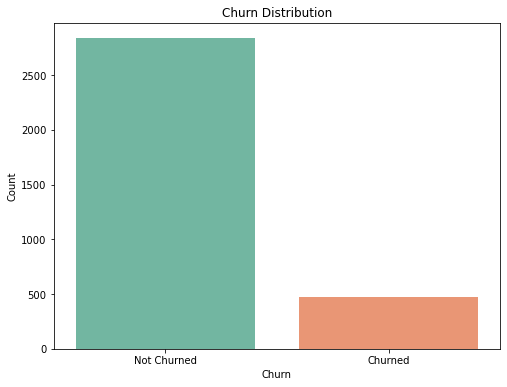

In [248]:
churn_counts = Syria_df['churn'].value_counts()
print(churn_counts)
# Plotting the churn distribution
plt.figure(figsize=(8, 6)) 
sns.countplot(x='churn', data=Syria_df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()

**Churn Value Counts & Countplot Visualization**  
The Visualization presents both **numerical output (`value_counts()`)** and **visual representation (countplot)** of churn categories. 

Based on the bar plot, out of a total of 3,308 customers in the dataset, 471 have discontinued their service with the company, representing approximately 14.24% of the customer base. This significant disparity highlights that the target variable is highly imbalanced, which can adversely affect the accuracy of the prediction model. The imbalance may lead to biased predictions, causing the model to favor the majority class and misclassify actual churn occurrences.



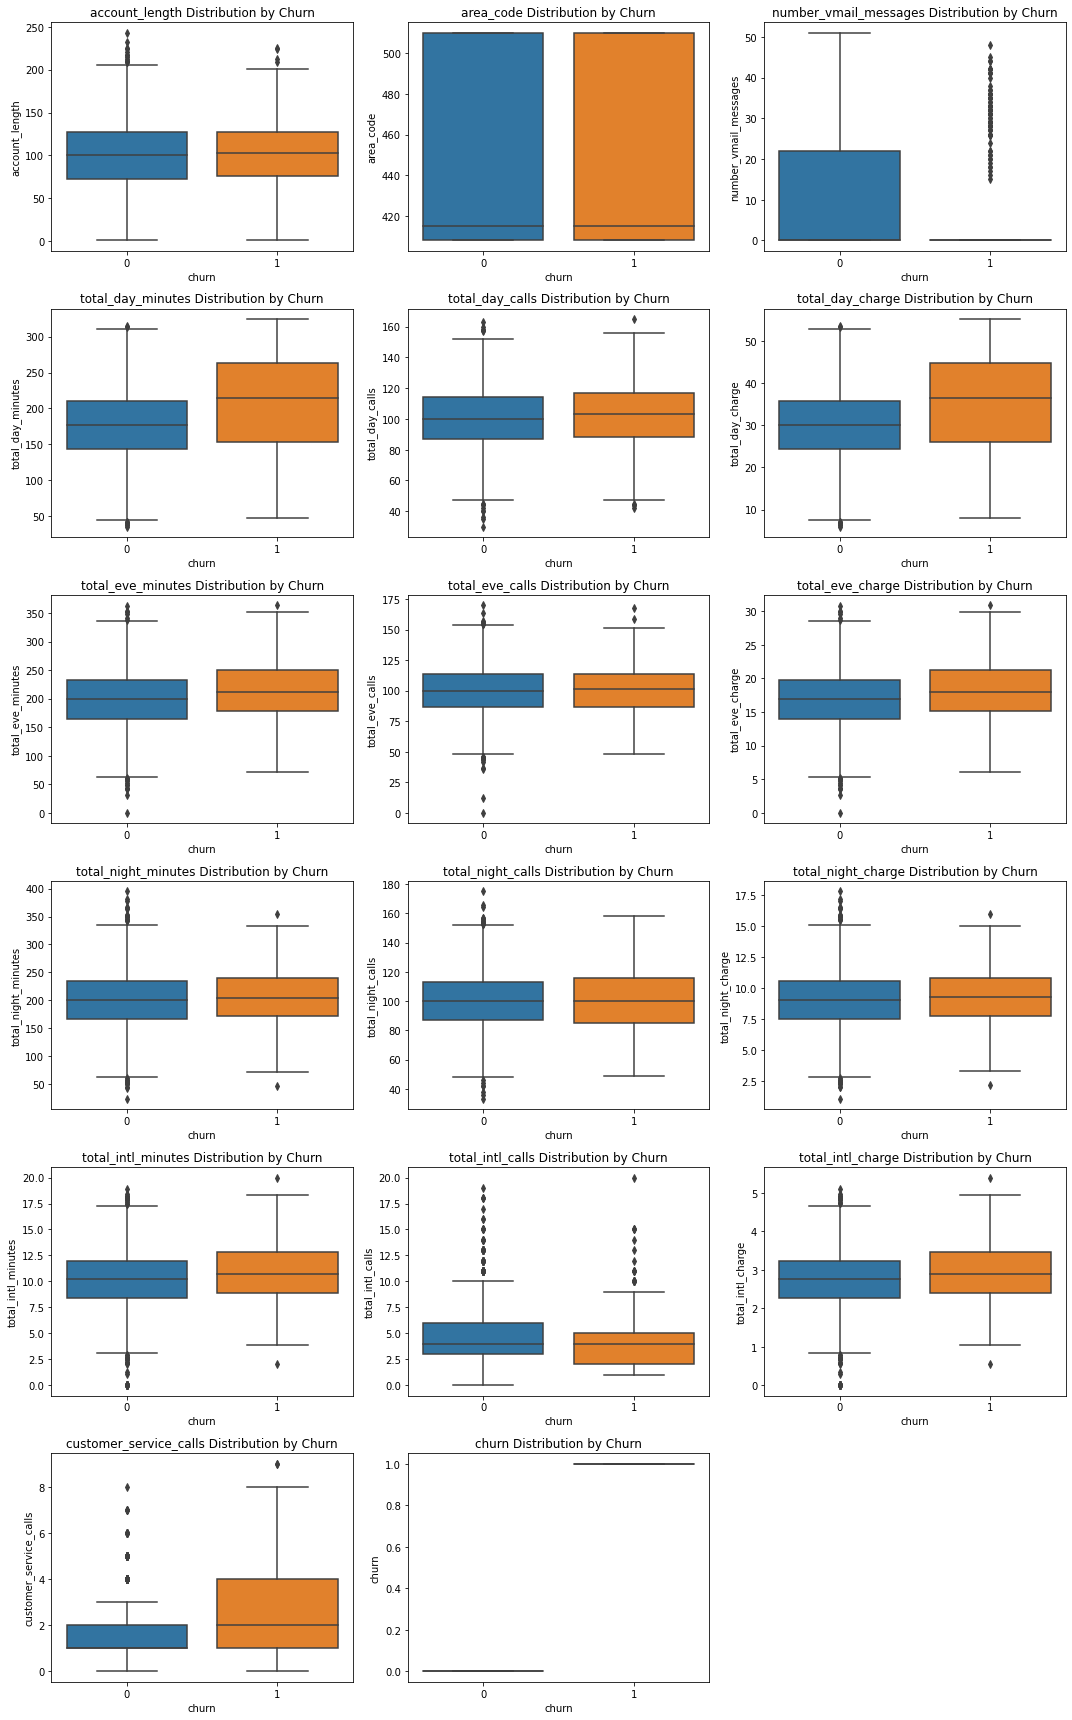

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of features and adjust layout dynamically
num_features = len(numerical_cols)
num_cols = 3  # Limit to 3 columns for better arrangement
num_rows = -(-num_features // num_cols)  # Equivalent to ceil division

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot boxplots in subplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=Syria_df['churn'], y=Syria_df[col], ax=axes[i])
    axes[i].set_title(f"{col} Distribution by Churn")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots

# Adjust layout for better readability
plt.tight_layout()
plt.show()


The churn distribution visualization provides insight into the proportion of customers who **churned** versus those who **remained** with the company. This is critical in assessing potential **class imbalance** before moving into predictive modeling.

#### **Key Observations**
1. **Churn Rate Differences**  
   - The **x-axis** represents customer churn, where `0` signifies customers who stayed, and `1` represents those who left.  
   - The **y-axis** indicates the **count of customers** for each category.  
   - A visual inspection suggests that a **majority of customers have NOT churned**, meaning the dataset is imbalanced.

2. **Potential Class Imbalance**
   - If the number of churned customers (`Churn = 1`) is significantly lower than non-churned customers (`Churn = 0`), it creates an **imbalance problem**.  
   - Models trained on imbalanced data may **favor non-churners**, making churn prediction **less effective**.  
  

3. **Impact on Machine Learning Models**  
   - **Bias in Predictions:** If the dataset is heavily skewed, a model may predict non-churners more accurately but struggle to detect actual churners.  
   - **Misclassification Risks:** Class imbalance can lead to a higher **false negative rate**, where churners are mistakenly classified as non-churners, impacting business strategy.  
   - **Mitigation Strategies:** If there is an imbalance, techniques such as **oversampling**, **undersampling**, and **SMOTE (Synthetic Minority Over-sampling Technique)** can help balance the dataset.

#### *Categorical Features*

a) **Distribution of International Plan and Voice Mail Plan**

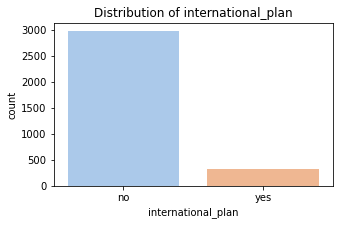

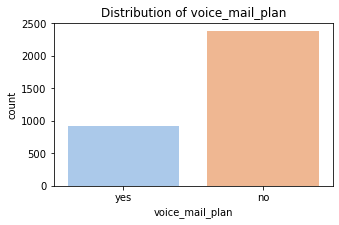

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['international_plan', 'voice_mail_plan']

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=Syria_df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.show()



The following visualizations display the distribution of customers based on their subscription to the **International Plan** and **Voice Mail Plan**:

    - International Plan: Shows the number of customers who have subscribed to the international calling plan versus those who have not

    - Voice Mail Plan: Illustrates the count of customers with and without a voice mail plan. 

- If a significant majority of customers do not subscribe to these plans, it may indicate an opportunity for targeted marketing or product improvement.
- Comparing the churn rates within each category can help determine if these plans influence customer retention.

b)**Distribution of Area Codes**

Area code counts:
415    1641
408     836
510     831
Name: area_code, dtype: int64


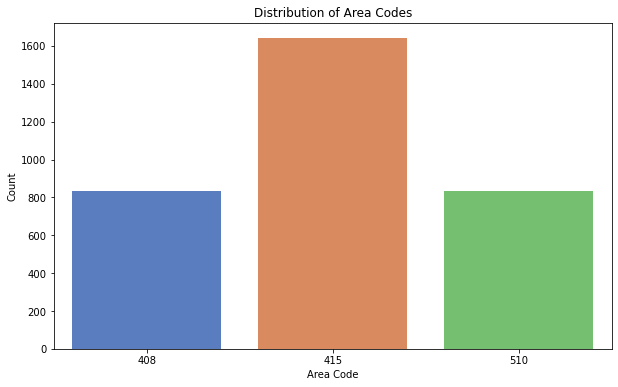

In [251]:
# check the distribution of the unique values
print("Area code counts:")
print(Syria_df['area_code'].value_counts())

# Countplot of area code
plt.figure(figsize=(10, 6))
sns.countplot(x='area_code', data=Syria_df, palette='muted')
plt.title('Distribution of Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

**Top Churn States**

Top 5 states with the most churned customers:
NJ    18
MD    17
TX    17
MI    16
MN    15
Name: state, dtype: int64


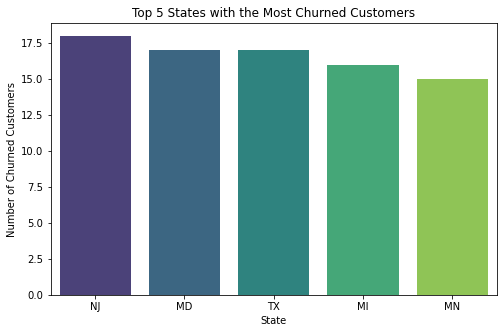

In [252]:
# Display the top 5 states with the most churned customers
top_churn_states = Syria_df[Syria_df['churn'] == 1]['state'].value_counts().head(5)
print("Top 5 states with the most churned customers:")
print(top_churn_states)

# Visualize the top 5 churned states
plt.figure(figsize=(8, 5))
sns.barplot(x=top_churn_states.index, y=top_churn_states.values, palette='viridis')
plt.title('Top 5 States with the Most Churned Customers')
plt.xlabel('State')
plt.ylabel('Number of Churned Customers')
plt.show()


The following analysis highlights the top 5 states with the highest number of churned customers in the SyriaTel dataset. Understanding the geographic distribution of churn can help the company target retention strategies more effectively.

 **Top 5 States by Churn Count**
| State | Number of Churned Customers | Percentage of Total Churned Customers |
|-------|-----------------------------|---------------------------------------|
| NJ    | 18                          | 3.82%                                 |
| MD    | 17                          | 3.61%                                 |
| TX    | 17                          | 3.61%                                 |
| MI    | 16                          | 3.40%                                 |
| MN    | 15                          | 3.19%                                 |

- **NJ (New Jersey)** leads with 18 churned customers, accounting for **3.82%** of all churned customers.
- **MD (Maryland)** and **TX (Texas)** each have 17 churned customers, representing **3.61%** each.
- **MI (Michigan)** follows with 16 churned customers (**3.40%**).
- **MN (Minnesota)** rounds out the top five with 15 churned customers (**3.19%**).

#### **Interpretation**
- These five states together account for **16.63%** of all churned customers (83 out of 499).
- The relatively close percentages suggest that churn is somewhat evenly distributed among these top states, but NJ stands out slightly.
- Targeted retention campaigns in these states could have a meaningful impact on reducing overall churn.

#### **Business Implication**
Focusing on the states with the highest churn rates allows SyriaTel to:
- Investigate region-specific issues (e.g., service quality, competition, or customer support).
- Deploy localized marketing or customer service interventions.
- Monitor the effectiveness of retention strategies in these key areas.


### **2. Correlation Analysis**

In [253]:
Syria_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

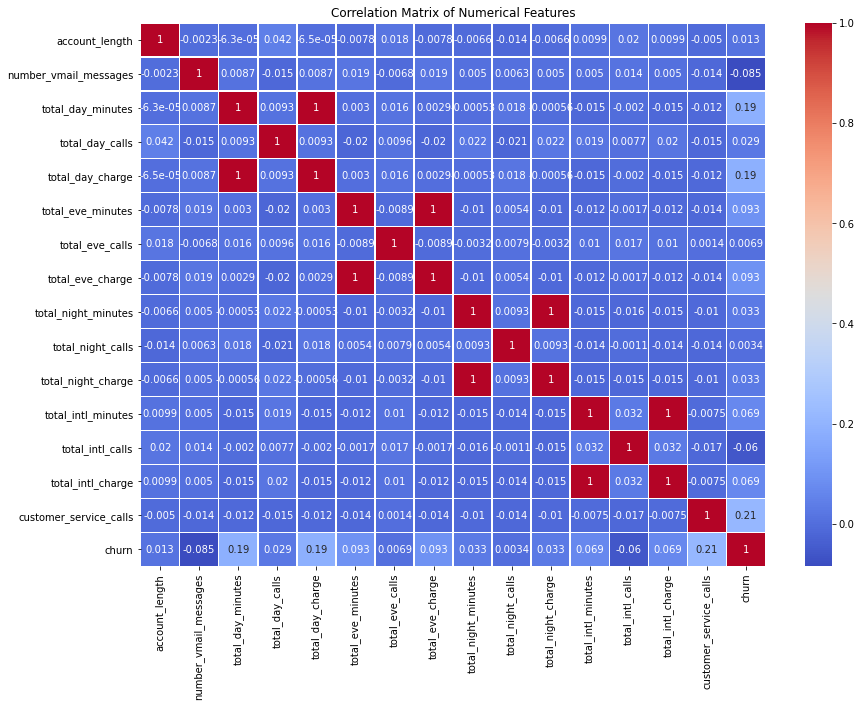

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numerical features
numerical_cols = ['account_length', 'number_vmail_messages',
                  'total_day_minutes', 'total_day_calls', 'total_day_charge',
                  'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                  'total_night_minutes', 'total_night_calls', 'total_night_charge',
                  'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                  'customer_service_calls', 'churn']  # include churn if numeric

# Compute correlation matrix
correlation_matrix = Syria_df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The heatmap provides insights into the relationships between numerical features in your dataset, helping to identify patterns that might influence customer churn. Here are the key takeaways:  

 **1. Strongly Correlated Features**  
  - **Total Minutes vs. Total Charge:**  
  - `Total Day Minutes`, `Total Eve Minutes`, `Total Night Minutes`, and `Total Intl Minutes` all have **strong positive correlations** with their respective charge columns.  
  - This is expected since charges are calculated directly from usage. These features might be redundant in predictive modeling.  

**2. Customer Service Calls & Churn**  

 **Customer Service Calls show a moderate positive correlation with churn**, meaning that customers who **contact support frequently** are more likely to leave.  
- This suggests that **dissatisfaction with service** may be a key factor in churn.  

**3. Weak Correlations with Churn**  
- `Total Day Minutes`, `Total Eve Minutes`, and other usage-related metrics show **low correlation with churn**, indicating that high usage does not necessarily mean a customer will leave.  
- **This suggests churn is driven by factors beyond just service usage, such as plan structure, billing issues, or customer satisfaction.**  

- Highly correlated features (e.g., `Total Day Minutes` & `Total Day Charge`) might be **redundant** and can be dropped or combined to **reduce dimensionality**.  
- `Customer Service Calls` is a strong predictor of churn and should be emphasized in modeling.  


### **3. Multicollinearlity**


*Multicollinearity* occurs when two or more independent variables in a dataset are highly correlated, implying that they provide overlapping information. This can lead to unreliable model coefficients, and reduced model interpretability. In order to address this challenge, we will compute the correlation matrix, and drop one feature from each pair of variables with a correlation coefficient greater than 0.9. This threshold will help eliminate redundancy while preserving the most informative features. Removing highly correlated features improves model stability, reduces overfitting risk, and ensures that each remaining variable contributes uniquely and significantly to the model's predictions.

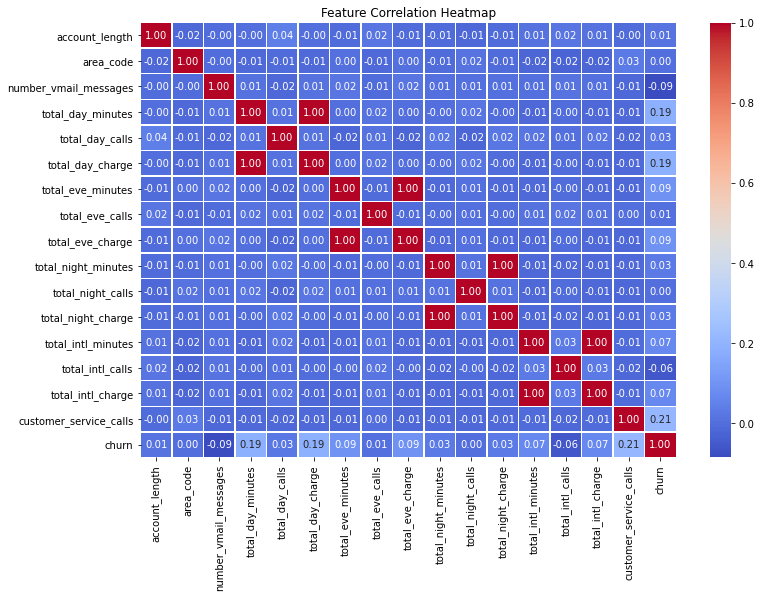

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = Syria_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap")
plt.show()